# 1.Download the dataset

In [1]:
#Dataset downloaded

# 2. Load the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Visualizations

## Univariate Analysis

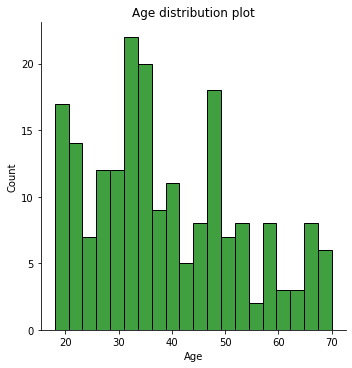

In [7]:
sns.displot(df['Age'],color= 'green',bins=20)
plt.title('Age distribution plot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

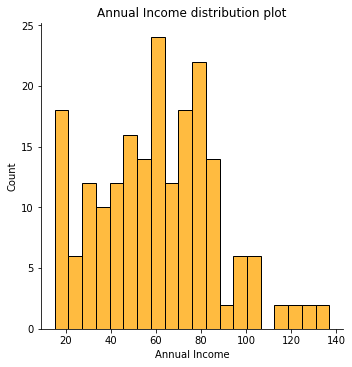

In [8]:
sns.displot(df['Annual Income (k$)'],color= 'orange',bins=20)
plt.title('Annual Income distribution plot')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

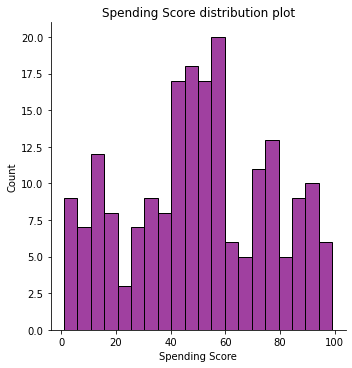

In [9]:
sns.displot(df['Spending Score (1-100)'],color= 'purple',bins=20)
plt.title('Spending Score distribution plot')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

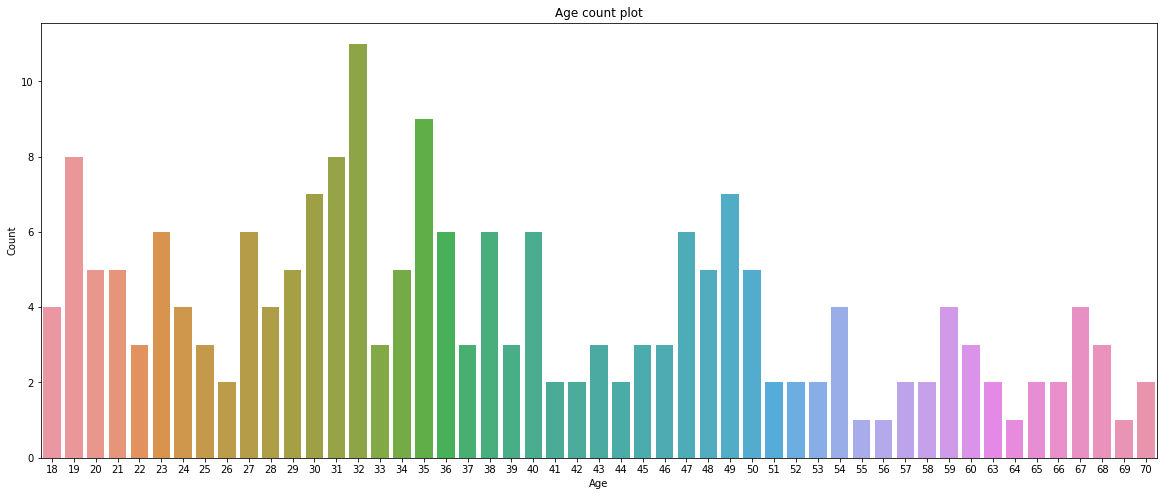

In [10]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'])
plt.title('Age count plot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

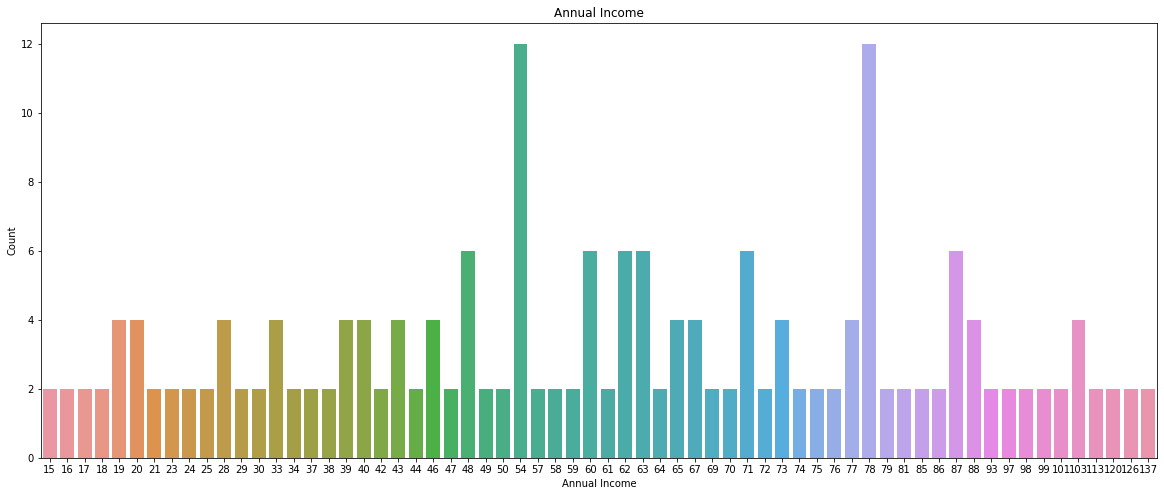

In [11]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Annual Income (k$)'])
plt.title('Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

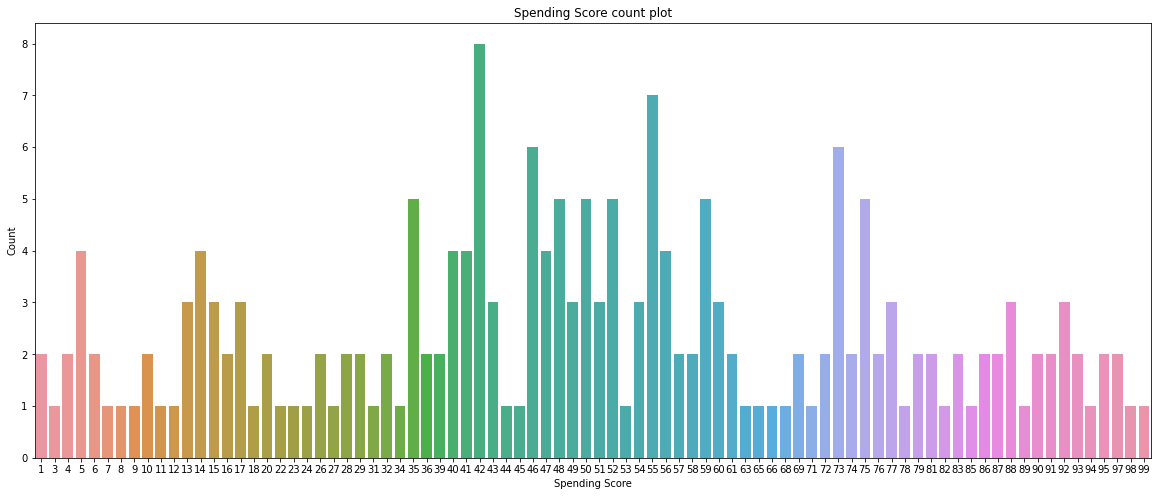

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Spending Score (1-100)'])
plt.title('Spending Score count plot')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

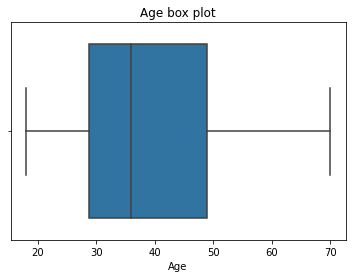

In [13]:
sns.boxplot(x=df['Age'])
plt.title('Age box plot')
plt.xlabel('Age')
plt.show()

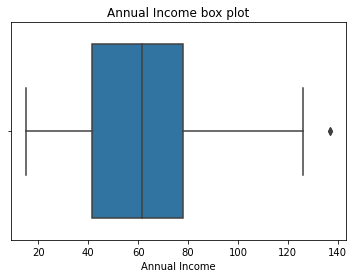

In [14]:
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Annual Income box plot')
plt.xlabel('Annual Income')
plt.show()

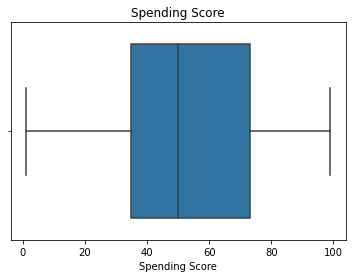

In [15]:
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Spending Score')
plt.xlabel('Spending Score')
plt.show()

## Bi-Variate Analysis

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

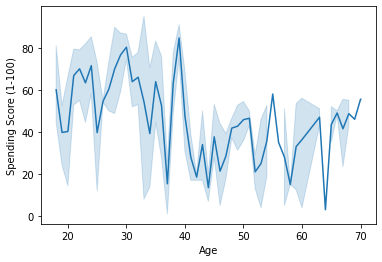

In [16]:
sns.lineplot(x=df['Age'],y=df['Spending Score (1-100)'])

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

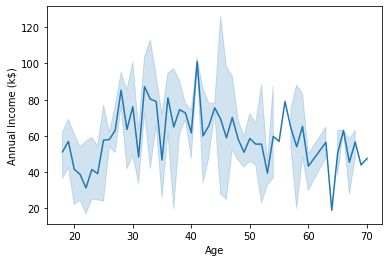

In [17]:
sns.lineplot(x=df['Age'],y=df['Annual Income (k$)'])

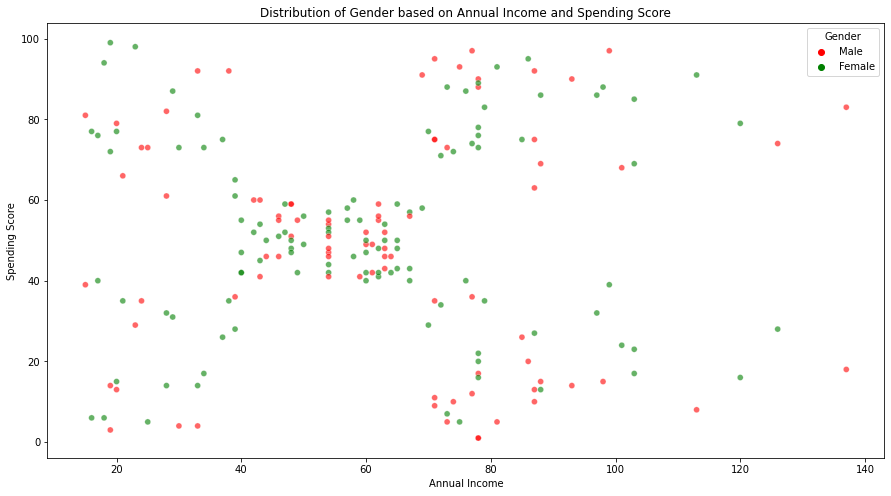

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=df['Gender'],
                palette= ['red','green'] ,alpha=0.6)
plt.title('Distribution of Gender based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Multi-Variate Analysis

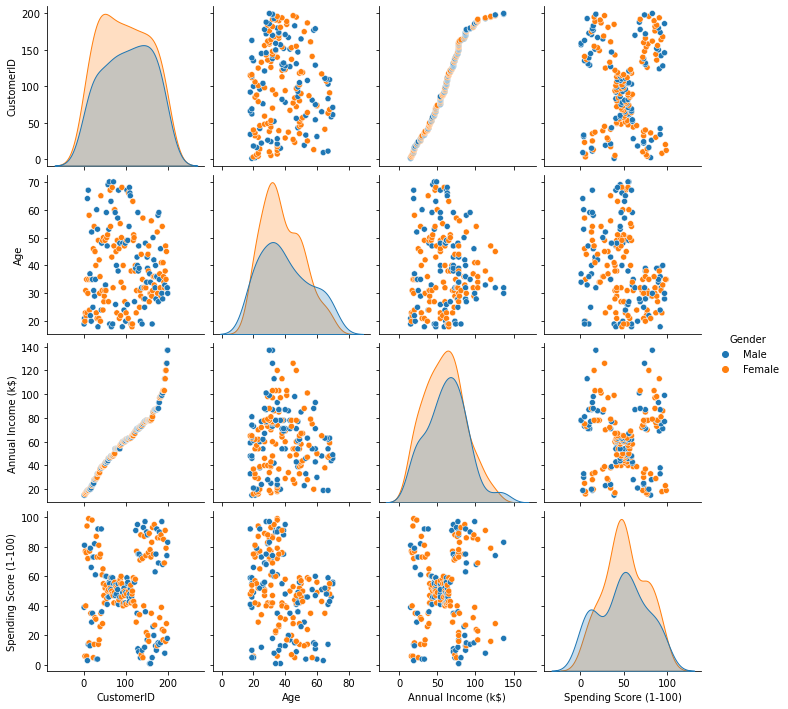

In [19]:
sns.pairplot(df,hue='Gender')

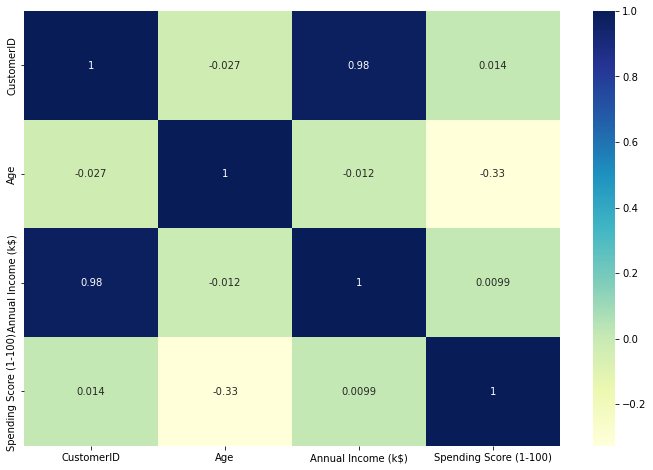

In [20]:
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True);

## 4. Descriptive statistics

In [21]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 5. Handle the Missing values

In [22]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 6. Find the outliers and replace the outliers

In [23]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

Q1,Q3,IQR,lower_bound,upper_bound

(41.5, 78.0, 36.5, -13.25, 132.75)

In [24]:
df[(df['Annual Income (k$)'] < lower_bound) | (df['Annual Income (k$)'] > upper_bound)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [25]:
df[(df['Annual Income (k$)'] > lower_bound) & (df['Annual Income (k$)'] < upper_bound)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [26]:
df = df[(df['Annual Income (k$)'] > lower_bound) & (df['Annual Income (k$)'] < upper_bound)]

<AxesSubplot:xlabel='Annual Income (k$)'>

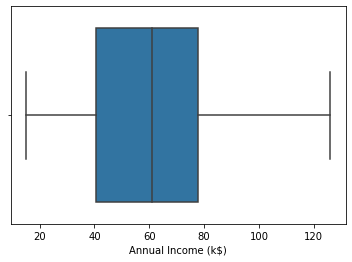

In [27]:
sns.boxplot(x=df['Annual Income (k$)'])

## 7. Check for Categorical columns and perform encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# 8. Scaling the data

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
data_scaled[0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00507614, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01015228, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01522843, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.02030457, 0.        , 0.25      , 0.01801802, 0.39795918]])

# 9. Perform any of the clustering algorithms

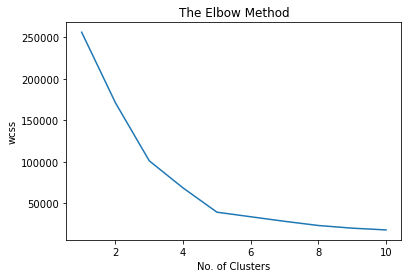

In [31]:
Income_Spend = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Income_Spend)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

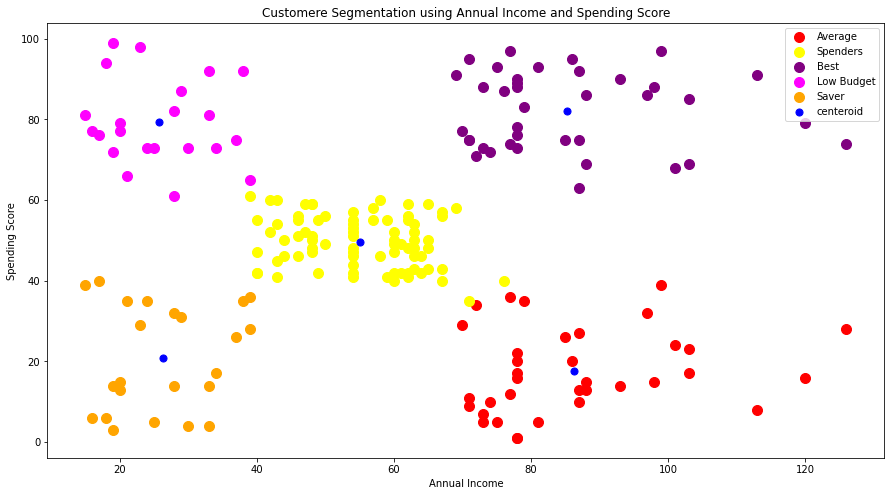

In [32]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(Income_Spend)

plt.figure(figsize=(15,8))
plt.scatter(Income_Spend[y_means == 0, 0], Income_Spend[y_means == 0, 1], s = 100, c = 'red', label = 'Average')
plt.scatter(Income_Spend[y_means == 1, 0], Income_Spend[y_means == 1, 1], s = 100, c = 'yellow', label = 'Spenders')
plt.scatter(Income_Spend[y_means == 2, 0], Income_Spend[y_means == 2, 1], s = 100, c = 'purple', label = 'Best')
plt.scatter(Income_Spend[y_means == 3, 0], Income_Spend[y_means == 3, 1], s = 100, c = 'magenta', label = 'Low Budget')
plt.scatter(Income_Spend[y_means == 4, 0], Income_Spend[y_means == 4, 1], s = 100, c = 'orange', label = 'Saver')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# 10. Add the cluster data with the primary dataset

In [33]:
pd.Series(y_means)

0      4
1      3
2      4
3      3
4      4
      ..
193    2
194    0
195    2
196    0
197    2
Length: 198, dtype: int32

In [34]:
df['Result'] = pd.Series(y_means)

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Result
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


# 11. Split the data into dependent and independent variables

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              198 non-null    int64
 1   Gender                  198 non-null    int32
 2   Age                     198 non-null    int64
 3   Annual Income (k$)      198 non-null    int64
 4   Spending Score (1-100)  198 non-null    int64
 5   Result                  198 non-null    int32
dtypes: int32(2), int64(4)
memory usage: 9.3 KB


In [37]:
x = df.iloc[:,1:5]

In [38]:
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [39]:
y = df['Result']

In [40]:
y.head()

0    4
1    3
2    4
3    3
4    4
Name: Result, dtype: int32

# 12. Split the data into training and testing

In [41]:
x.shape, y.shape

((198, 4), (198,))

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [44]:
x_train.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
137,1,32,73,73
5,0,22,17,76


In [45]:
x_train.shape

(158, 4)

In [46]:
x_test.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
65,1,18,48,59
114,0,18,65,48


In [47]:
x_test.shape

(40, 4)

In [48]:
y_train.head(2)

137    2
5      3
Name: Result, dtype: int32

In [49]:
y_train.shape

(158,)

In [50]:
y_test.head(2)

65     1
114    1
Name: Result, dtype: int32

In [51]:
y_test.shape

(40,)

# Build the Model, Train the Model and Test the Model

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

param = {
    'max_depth':[3,6,9,12,15],
    'n_estimators' : [10,50,100,150,200] 
}

rf_search = RandomizedSearchCV(rf,param_distributions=param,n_iter=5,scoring=make_scorer(mean_squared_error),
                               n_jobs=-1,cv=5,verbose=3)

rf_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 9, 12, 15],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   scoring=make_scorer(mean_squared_error), verbose=3)

In [53]:
means = rf_search.cv_results_['mean_test_score']
params = rf_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

0.063256 with: {'n_estimators': 100, 'max_depth': 3}
0.051972 with: {'n_estimators': 10, 'max_depth': 9}
Best parameters with the minimum Mean Square Error are: {'n_estimators': 10, 'max_depth': 9}
0.058608 with: {'n_estimators': 50, 'max_depth': 15}
0.077327 with: {'n_estimators': 10, 'max_depth': 15}
0.056575 with: {'n_estimators': 200, 'max_depth': 6}


In [54]:
rf = RandomForestRegressor(n_estimators=10, max_depth=9)
rf.fit(x_train,y_train)

rf_pred =  rf.predict(x_test)

# 16. Measure the performance using Metrics

In [55]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print('R2 Score :',metrics.r2_score(y_test,rf_pred))

MAE: 0.05500000000000001
MSE: 0.061
RMSE: 0.2469817807045694
R2 Score : 0.9525060827250609
